# Data Analysis of Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
species               0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [11]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
series_sepal_length=df['sepal_length_in_cm']
series_sepal_length.describe().to_csv('sepal_length')



In [15]:
series_sepal_width=df['sepal_width_in_cm']
series_sepal_width.describe().to_csv('sepal_width')

In [16]:
series_petal_length=df['petal_length_in_cm']
series_petal_length.describe().to_csv('petal_length')

In [17]:
series_petal_width=df['petal_width_in_cm']
series_petal_width.describe().to_csv('petal_width')

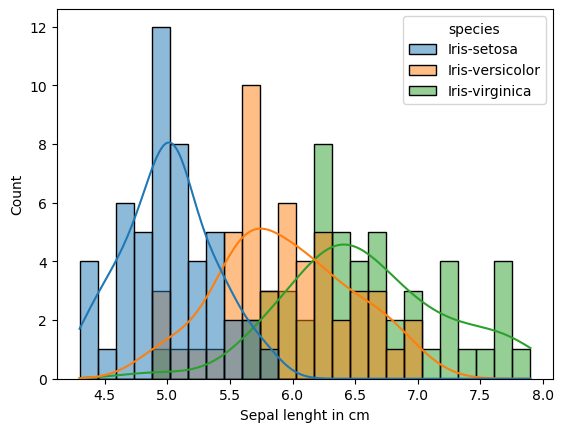

In [7]:
plot=sns.histplot(df, x=df['sepal_length_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Sepal lenght in cm')
plt.savefig('sepal_lenght_hist.png')

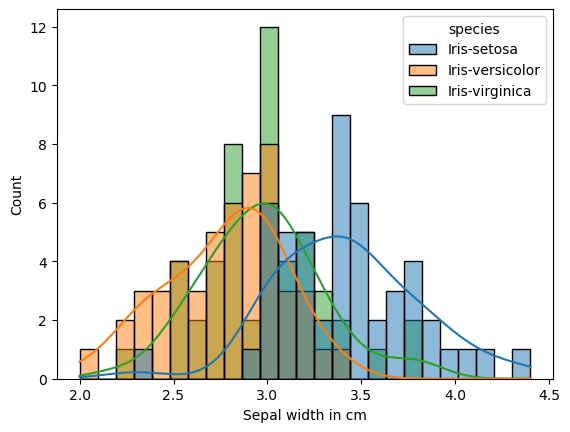

In [8]:
sns.histplot(df, x=df['sepal_width_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Sepal width in cm')
plt.savefig('sepal_width_hist.png')

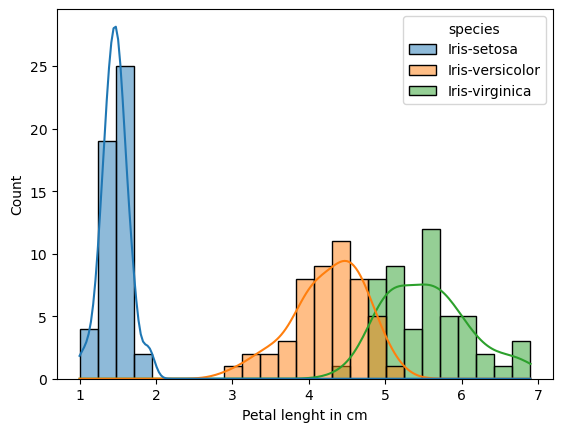

In [9]:
sns.histplot(df, x=df['petal_length_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Petal lenght in cm')
plt.savefig('petal_lenght_hist.png')

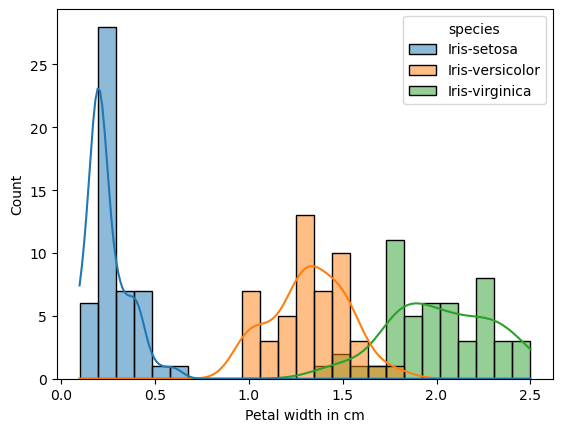

In [10]:
sns.histplot(df, x=df['petal_width_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Petal width in cm')
plt.savefig('petal_width_hist.png')

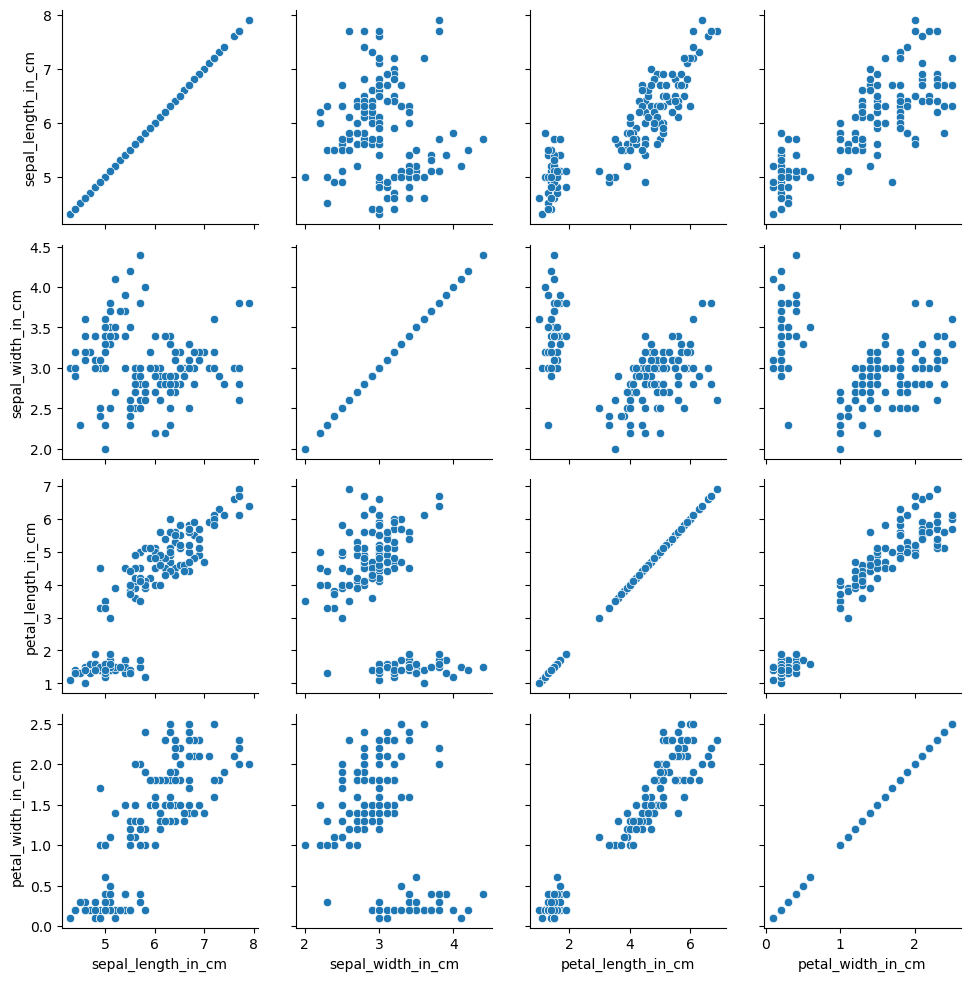

In [16]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

<Axes: xlabel='sepal_length_in_cm', ylabel='sepal_width_in_cm'>

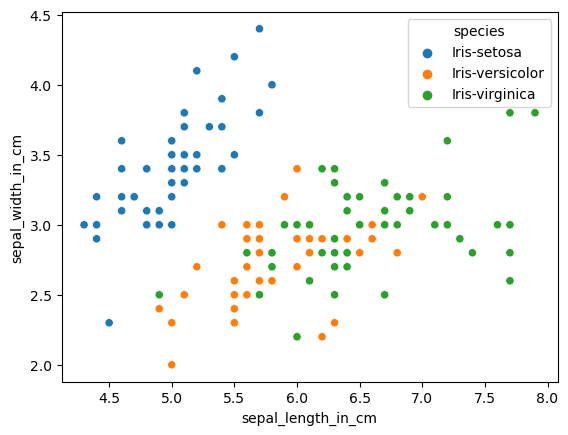

In [14]:
sns.scatterplot(df, x='sepal_length_in_cm', y='sepal_width_in_cm', hue='species')

<Axes: xlabel='sepal_length_in_cm', ylabel='petal_length_in_cm'>

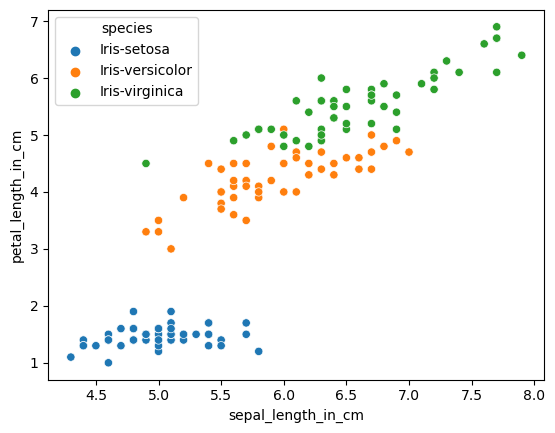

In [15]:
sns.scatterplot(df, x='sepal_length_in_cm', y='petal_length_in_cm', hue='species')

In [35]:
df.cov(numeric_only=True)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
sepal_length_in_cm,0.685694,-0.039268,1.273682,0.516904
sepal_width_in_cm,-0.039268,0.188004,-0.321713,-0.117981
petal_length_in_cm,1.273682,-0.321713,3.113179,1.296387
petal_width_in_cm,0.516904,-0.117981,1.296387,0.582414


<Axes: >

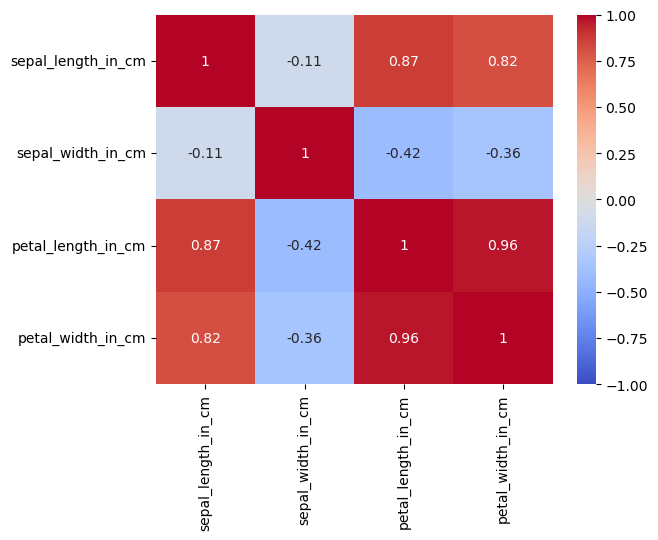

In [13]:
corr_coef=df.corr(numeric_only=True)
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', vmin=-1,vmax=1)


***
### End